<a href="https://colab.research.google.com/github/nathaliacristina-arch/Algoritmos_em_Bioinform-tica/blob/main/Atividade_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Objetivo:
# - Ler arquivo no formato "FASTA" com várias sequências de DNA
# - realizar cálculos com informações da sequências de DNA da influenza
# -  colocar os dados calculados em gráfico.


# Problema: dado um arquivo no formato "FASTA" com diversas sequências de DNA (Influenza H3N2). Um arquivo FASTA pode ter mais de uma sequência. Até o momento trabalhamos com arquivos fasta com 1 única sequência.


# Comparação entre vários formatos de armazenar  seq.: https://bioinformatics.uconn.edu/resources-and-events/tutorials-2/file-formats-tutorial/

# Faça um programa que leia todos as sequências do arquivo fasta Influenza H3N2 e calcule :
# 1) Número total de nucleotídeos  e de A, T C e G de cada sequência;


# 2) Conteúdo GC para cada sequência.


# 3) Calcular o temperatura de anelamento (melting) do DNA (DNA melting temperature), para cada gene (sequência), utilizando a conteúdo GC e [Na+] = 100 mM.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.9/dist-packages/Bio/SeqUtils/__init__.py:144: BiopythonDeprecationWarning: GC is deprecated; please use gc_fraction instead.
  warnings.warn(


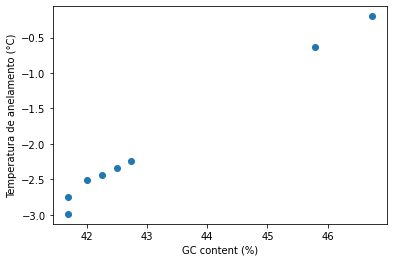

In [ ]:
!pip install biopython


from Bio import SeqIO
from Bio.SeqUtils import GC
from Bio.SeqUtils.MeltingTemp import Tm_NN

with open("Influenza H3N2.fasta", "r") as handle:
    records = list(SeqIO.parse(handle, "fasta")) #abre o arquivo e le

numero_nucleotidios = []
cont_A = []
cont_T = []
cont_C = []
cont_G = []
gc_content = []
tm_values = []

for record in records:
    seq = record.seq
    numero_nucleotidios.append(len(seq))
    cont_A.append(seq.count('A'))
    cont_T.append(seq.count('T'))
    cont_C.append(seq.count('C'))
    cont_G.append(seq.count('G'))
    gc_content.append(GC(seq))
    tm_values.append(Tm_NN(seq,Na=0.1, K=0, Tris=0, Mg=0, dNTPs=0, saltcorr=7))

#transfere os resultados em arquivo texto
with open("results.txt", "w") as handle:
    for i in range(len(records)):
        handle.write(f"Sequence {i+1}:\n")
        handle.write(f"Number of nucleotides: {num_nucleotidios[i]}\n")
        handle.write(f"Number of A's: {cont_A[i]}\n")
        handle.write(f"Number of T's: {cont_T[i]}\n")
        handle.write(f"Number of C's: {cont_C[i]}\n")
        handle.write(f"Number of G's: {cont_G[i]}\n")
        handle.write(f"GC content: {gc_content[i]:.2f}%\n")
        handle.write(f"Temperatura de anelamento: {tm_values[i]:.2f}°C\n")
        handle.write("\n")

#  gráfico
import matplotlib.pyplot as plt


plt.scatter(gc_content, tm_values)
plt.xlabel("GC content (%)")
plt.ylabel("Temperatura de anelamento (°C)")
plt.show()
